# Prospects of a opening an Vegan Restaurant in Manhattan

As part of the IBM Data Science Capstone Project, I have
decided to work on the problem on finding the best location to
start a new Vegan restaurant in New York. Main objective of
this section was to define the problem and discuss the ways in
which the data can be found. The data will be got from
different sources including the web, open source .CSV files and
Four Square data. Analysis will be done on this data to find out
which is the best neighbourhood suitable for starting a new
vegan restaurant. In this report, the step-by-step process from
explaining the problem, preparing the data, analysing, and thus
deriving the conclusion will be discussed in detail.
## Introduction: Description of the problem.
New York City has been described as the cultural, financial, and
media capital of the world, significantly influencing
commerce, entertainment, research, technology, education,
politics, tourism, art, fashion, and sports. New York City is
composed of five boroughs, each of which is a county of the
State of New York. The five boroughs -
Brooklyn, Queens, Manhattan, the Bronx, and Staten Island.
New York City's food culture includes an array of international
cuisines influenced by the city's immigrant history. The city is
home to "nearly one thousand of the finest and most
diverse haute cuisine restaurants in the world", according
to Michelin. Hence it will be an easy choice to start a new
Vegan Restaurant in New York, but with limited knowledge of
the demographics starting a restaurant in an already
overcrowded market will be futile.
Hence the criteria set by the clients to look for the best
neighbourhood to start the restaurant will be as follows:
 Above average populations of 25–40-year-old male and female
professionals as vegan food is aimed towards this age
range.
 Average to above average median net household incomes as
this will be an high end vegan restaurant
### Target audience:
1. Business personnel who wants to invest or open a Vegan
restaurant or any other type of new restaurant in an already
crowded New York market. This analysis will be a comprehensive
guide to start or expand restaurants targeting the
young to middle aged crowd.
2. Freelancer Chef who loves to have their own restaurant as a
side-line.

## Data:
Mainly two types of data will be used for this project.
### 1. The first one is the file containing the neighbourhoods of New
York. Neighborhood has a total of 5 boroughs and 306
neighborhoods. In order to segement the neighborhoods and
explore them, we will essentially need a dataset that contains the
5 boroughs and the neighborhoods that exist in each borough as
well as the the latitude and logitude coordinates of each
neighborhood.
Luckily, this dataset exists for free on the web. Here is the link to the
dataset: https://geo.nyu.edu/catalog/nyu_2451_34572
a) And this will be converted to a DataFrame.
Assumptions made to a DataFrame of neighbourhoods in New York:
 Dataframe will consist of three columns: PostalCode, Borough, and
Neighborhood
 Only the cells that have an assigned borough will be processed.
Borough that is not assigned are ignored.
 More than one neighborhood can exist in one postal code area.
These two rows will be combined into one row with the
neighborhoods separated with a comma as shown in row 11 in the
above table.
 If a cell has a borough but a Not assigned neighborhood, then the
neighborhood will be the same as the borough.
b) Adding geographical coordinates to the neighborhoods
Next important step is adding the geographical coordinates to these
neighborhoods. To do so we will be extracting the data present in the
Geospatial Data csv file and combining it with the existing neighborhood
dataframe by merging them both based on the postal code.
Neighbourhood level data from a variety of other sources are also
available through the City’s mapping application and here on the Open
Data portal.
Each data point in this file is presented for the City’s neighbourhoods, as
well as for the City of Toronto as a whole. The data is sourced from
several Census tables released by Statistics. The general Census Profile is
the main source table for this data, but other Census tables have also
been used to provide additional information.
c) Scrap the distribution of population from Wikipedia
Another factor that can help us in deciding which neighborhood would
be best option to open a restaurant is, the distribution of population
based on the ethnic diversity for each neighborhood. As this helps us in
identifying the neighborhoods which are densely populated with Indian
crowd since that neighborhood would be an ideal place to open an Indian
restaurant.
### 2) The other type of data is from FourSquare to get the location data
of venues in the neighbourhoods. Foursquare API is very useful
online application used my many developers & other applications
like Uber etc. In this project we will use it to retrieve information
about the places present in the neighborhoods of New York. The
API returns a JSON file and we need to turn that into a data-frame.
Here we will choose 100 popular spots for each neighbourhood
within a radius of 1km.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
neighborhoods_data = newyork_data['features']

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)



The dataframe has 5 boroughs and 306 neighborhoods.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [16]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [17]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [18]:
CLIENT_ID = 'XLPXOZBRB20RDJQXBXCLPVPGZU5HEAFFRZ5SKL3BHZECXEWE' # your Foursquare ID
CLIENT_SECRET = '0GU4EJSZC4SAFOLZF5RG0FMAXIATXU155OURF5RVCK0NFHXR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XLPXOZBRB20RDJQXBXCLPVPGZU5HEAFFRZ5SKL3BHZECXEWE
CLIENT_SECRET:0GU4EJSZC4SAFOLZF5RG0FMAXIATXU155OURF5RVCK0NFHXR


In [19]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [20]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XLPXOZBRB20RDJQXBXCLPVPGZU5HEAFFRZ5SKL3BHZECXEWE&client_secret=0GU4EJSZC4SAFOLZF5RG0FMAXIATXU155OURF5RVCK0NFHXR&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8aff8140a7ea001c83c941'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [29]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3279, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [30]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shoppin

In [31]:
manhattan_onehot.shape

(3279, 331)

In [32]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shoppin

In [33]:
manhattan_grouped.shape

(40, 331)

In [34]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.07
1          Hotel  0.06
2    Coffee Shop  0.06
3  Shopping Mall  0.03
4  Boat or Ferry  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.06
1            Café  0.05
2     Pizza Place  0.04
3          Bakery  0.03
4  Cosmetics Shop  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1    French Restaurant  0.05
2   Chinese Restaurant  0.05
3  American Restaurant  0.05
4                  Bar  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.07
1               Bakery  0.05
2   Italian Restaurant  0.04
3  American Restaurant  0.03
4       Ice Cream Shop  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1         Cocktail Bar  0.05
2  American Restaurant  0.04
3   Salon / Barbershop  0.03
4    Hotpot Restaurant  0.03


----Civic Center----
                  venue  freq
0           Coffee Shop  0.06


In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Wine Shop,Boat or Ferry,Memorial Site,Shopping Mall,Clothing Store,Gym,Food Court
1,Carnegie Hill,Coffee Shop,Café,Pizza Place,Cosmetics Shop,French Restaurant,Bookstore,Wine Shop,Bakery,Gym / Fitness Center,Gym
2,Central Harlem,African Restaurant,Chinese Restaurant,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Caribbean Restaurant,Library,Bookstore,Boutique
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Hotel,Ice Cream Shop,American Restaurant,French Restaurant,Theater,Bookstore,Market
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Optical Shop,Dessert Shop,Vietnamese Restaurant,Spa,Hotpot Restaurant,Bakery


In [39]:
manhattan_part = manhattan_grouped[['Neighborhood', 'Vegetarian / Vegan Restaurant']]
manhattan_part


,Neighborhood,Vegetarian / Vegan Restaurant
0,Battery Park City,0.000000
1,Carnegie Hill,0.010753
2,Central Harlem,0.000000
3,Chelsea,0.000000
4,Chinatown,0.010000
5,Civic Center,0.000000
6,Clinton,0.010000
7,East Harlem,0.000000
8,East Village,0.030000
9,Financial District,0.000000


In [41]:
manhattan1_merged = pd.merge(manhattan_venues, manhattan_part, on='Neighborhood')
manhattan1_merged

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Vegetarian / Vegan Restaurant
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,Pizza Place,0.000000
1,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio,0.000000
2,Marble Hill,40.876551,-73.910660,Tibbett Diner,40.880404,-73.908937,Diner,0.000000
3,Marble Hill,40.876551,-73.910660,Dunkin',40.877136,-73.906666,Donut Shop,0.000000
4,Marble Hill,40.876551,-73.910660,Starbucks,40.877531,-73.905582,Coffee Shop,0.000000
5,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym,0.000000
6,Marble Hill,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym,0.000000
7,Marble Hill,40.876551,-73.910660,T.J. Maxx,40.877232,-73.905042,Department Store,0.000000
8,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant,0.000000
9,Marble Hill,40.876551,-73.910660,TCR The Club of Riverdale,40.878628,-73.914568,Tennis Stadium,0.000000


In [47]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(250,90))

sns.set(font_scale=1.1)
sns.violinplot(y="Vegetarian / Vegan Restaurant", x="Neighborhood", data=manhattan1_merged, cut=0);

plt.title('Violin plots of Veg/Vegan restaurants in New York', fontsize=14)
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


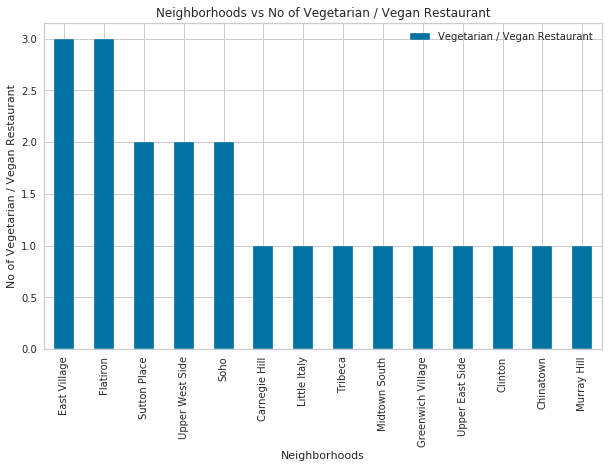

In [67]:
graph = pd.DataFrame(manhattan_onehot.groupby('Neighborhood')['Vegetarian / Vegan Restaurant'].sum())
graph = graph.sort_values(by ='Vegetarian / Vegan Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Vegetarian / Vegan Restaurant")
plt.title("Neighborhoods vs No of Vegetarian / Vegan Restaurant")
plt.show()

# Clustering

In [68]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1, 4, 0, 0, 4, 4, 0], dtype=int32)

In [71]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Pharmacy,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,4,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Optical Shop,Dessert Shop,Vietnamese Restaurant,Spa,Hotpot Restaurant,Bakery
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Grocery Store,Bakery,Chinese Restaurant,Mobile Phone Shop,Deli / Bodega,Mexican Restaurant,Latin American Restaurant,Supermarket,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,American Restaurant,Chinese Restaurant,Frozen Yogurt Shop,Bakery,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Sushi Restaurant,Caribbean Restaurant,School,Bakery,Sandwich Place


In [70]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,African Restaurant,Chinese Restaurant,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Caribbean Restaurant,Library,Bookstore,Boutique
13,Lincoln Square,Italian Restaurant,Plaza,Café,Theater,Performing Arts Venue,American Restaurant,Concert Hall,Gym / Fitness Center,Indie Movie Theater,Gym
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Spa,American Restaurant,Hotel,Wine Shop,Gym,Sandwich Place
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Café,French Restaurant,Indian Restaurant,American Restaurant,Gym,Bubble Tea Shop,Cosmetics Shop
21,Tribeca,American Restaurant,Park,Italian Restaurant,Spa,Café,Greek Restaurant,Wine Bar,Men's Store,Coffee Shop,Hotel
24,West Village,Italian Restaurant,New American Restaurant,American Restaurant,Jazz Club,Park,Wine Bar,Cocktail Bar,Bakery,Coffee Shop,Theater
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Sandwich Place,Deli / Bodega,Burger Joint,Seafood Restaurant,Tennis Court,Farmers Market
27,Gramercy,Italian Restaurant,Bar,Mexican Restaurant,American Restaurant,Pizza Place,Playground,Ice Cream Shop,Hotel,Grocery Store,Cocktail Bar
28,Battery Park City,Park,Hotel,Coffee Shop,Wine Shop,Boat or Ferry,Memorial Site,Shopping Mall,Clothing Store,Gym,Food Court
29,Financial District,Coffee Shop,Bar,American Restaurant,Gym,Pizza Place,Food Truck,Gym / Fitness Center,Japanese Restaurant,Cocktail Bar,Italian Restaurant


In [53]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Bakery,Art Gallery,Gym / Fitness Center,Juice Bar,Exhibit,Yoga Studio,Hotel,French Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Gym / Fitness Center,Café,Gym,Burger Joint,Salad Place
12,Upper West Side,Italian Restaurant,Bar,Wine Bar,Mediterranean Restaurant,Indian Restaurant,Coffee Shop,Bakery,Café,Sushi Restaurant,Yoga Studio
15,Midtown,Hotel,Clothing Store,Coffee Shop,Sporting Goods Shop,Bookstore,French Restaurant,Theater,Café,Steakhouse,Bakery
16,Murray Hill,Coffee Shop,Sandwich Place,Japanese Restaurant,Hotel,American Restaurant,Gym / Fitness Center,Bar,Italian Restaurant,Mediterranean Restaurant,Cocktail Bar
17,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Hotel,Ice Cream Shop,American Restaurant,French Restaurant,Theater,Bookstore,Market
22,Little Italy,Bakery,Café,Bubble Tea Shop,Italian Restaurant,Mediterranean Restaurant,Salon / Barbershop,Sandwich Place,Cocktail Bar,Hotel,Tea Room
23,Soho,Clothing Store,Women's Store,Italian Restaurant,Boutique,Bakery,Mediterranean Restaurant,Coffee Shop,Shoe Store,Hotel,Spa
30,Carnegie Hill,Coffee Shop,Café,Pizza Place,Cosmetics Shop,French Restaurant,Bookstore,Wine Shop,Bakery,Gym / Fitness Center,Gym
33,Midtown South,Korean Restaurant,Japanese Restaurant,Hotel,Dessert Shop,Hotel Bar,Coffee Shop,Gym / Fitness Center,American Restaurant,Cocktail Bar,Salad Place


In [54]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Bar,Park,Heliport,Gym / Fitness Center,Gas Station,Harbor / Marina,Pet Service,Farmers Market,Coffee Shop


In [55]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Pharmacy,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place


In [56]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Optical Shop,Dessert Shop,Vietnamese Restaurant,Spa,Hotpot Restaurant,Bakery
2,Washington Heights,Café,Grocery Store,Bakery,Chinese Restaurant,Mobile Phone Shop,Deli / Bodega,Mexican Restaurant,Latin American Restaurant,Supermarket,Supplement Shop
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,American Restaurant,Chinese Restaurant,Frozen Yogurt Shop,Bakery,Park
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Sushi Restaurant,Caribbean Restaurant,School,Bakery,Sandwich Place
5,Manhattanville,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Italian Restaurant,Park,Spanish Restaurant,Climbing Gym,Bike Trail,Liquor Store,Lounge
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Steakhouse,Cocktail Bar,French Restaurant,Beer Bar,Grocery Store
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Wine Shop
11,Roosevelt Island,Coffee Shop,Bubble Tea Shop,Sandwich Place,Greek Restaurant,Outdoors & Recreation,Farmers Market,Dog Run,Liquor Store,Scenic Lookout,Gym / Fitness Center
19,East Village,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Mexican Restaurant,Cocktail Bar,Coffee Shop,Korean Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant
20,Lower East Side,Chinese Restaurant,Café,Coffee Shop,Theater,Japanese Restaurant,Cocktail Bar,Bakery,Art Gallery,Ramen Restaurant,Sandwich Place


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


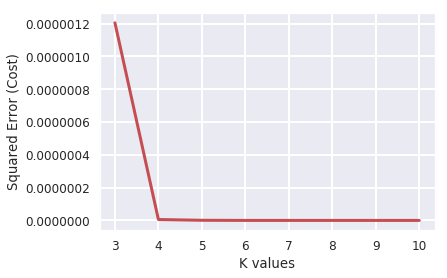

In [57]:
from sklearn.cluster import KMeans

manhattan_part_clustering = manhattan_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(manhattan_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()


In [73]:

!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

# All requested packages already installed.



In [77]:

# Instantiate the clustering model and visualizer
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(3,10))

#visualizer.fit(manhattan_part_clustering)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

### After analysing using elbow method looks like K = 4 is the best value.
#### Clustering the Toronto Neighborhood Using K-Means with K = 4

In [79]:
kclusters = 4

manhattan_part_clustering = manhattan_part.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_part_clustering)

kmeans.labels_


array([0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0], dtype=int32)

### Folium map for the visualisation of clusters

In [82]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [85]:
#Cluster 0
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0]

#this gives the neighbourhoods with the least population of Vegan restaurants given by the red colour in the folium map

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manhattan,Central Harlem,40.815976,-73.943211,0,African Restaurant,Chinese Restaurant,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Caribbean Restaurant,Library,Bookstore,Boutique
13,Manhattan,Lincoln Square,40.773529,-73.985338,0,Italian Restaurant,Plaza,Café,Theater,Performing Arts Venue,American Restaurant,Concert Hall,Gym / Fitness Center,Indie Movie Theater,Gym
14,Manhattan,Clinton,40.759101,-73.996119,0,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Spa,American Restaurant,Hotel,Wine Shop,Gym,Sandwich Place
18,Manhattan,Greenwich Village,40.726933,-73.999914,0,Italian Restaurant,Clothing Store,Sushi Restaurant,Café,French Restaurant,Indian Restaurant,American Restaurant,Gym,Bubble Tea Shop,Cosmetics Shop
21,Manhattan,Tribeca,40.721522,-74.010683,0,American Restaurant,Park,Italian Restaurant,Spa,Café,Greek Restaurant,Wine Bar,Men's Store,Coffee Shop,Hotel
24,Manhattan,West Village,40.734434,-74.006180,0,Italian Restaurant,New American Restaurant,American Restaurant,Jazz Club,Park,Wine Bar,Cocktail Bar,Bakery,Coffee Shop,Theater
26,Manhattan,Morningside Heights,40.808000,-73.963896,0,Park,Coffee Shop,American Restaurant,Bookstore,Sandwich Place,Deli / Bodega,Burger Joint,Seafood Restaurant,Tennis Court,Farmers Market
27,Manhattan,Gramercy,40.737210,-73.981376,0,Italian Restaurant,Bar,Mexican Restaurant,American Restaurant,Pizza Place,Playground,Ice Cream Shop,Hotel,Grocery Store,Cocktail Bar
28,Manhattan,Battery Park City,40.711932,-74.016869,0,Park,Hotel,Coffee Shop,Wine Shop,Boat or Ferry,Memorial Site,Shopping Mall,Clothing Store,Gym,Food Court
29,Manhattan,Financial District,40.707107,-74.010665,0,Coffee Shop,Bar,American Restaurant,Gym,Pizza Place,Food Truck,Gym / Fitness Center,Japanese Restaurant,Cocktail Bar,Italian Restaurant


In [88]:
#Cluster 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3]

#this gives the only neighbourhood with the largest population of Vegan restaurants given by the light blue colour in the folium map

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.91066,3,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Pharmacy,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place


### Results and Discussion:
####  Results
We have reached the end of the analysis, in the result section we can document all the findinds from above clustering & visualization of the datas. In this project, as the business problem started with identifying a good neighborhood to open a new Vegan restaurant, we looked into all the neighborhoods in manhattan, analysed  spread of Vegan restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Vegan restaurant. I have used data from web resources like Wikipedia, geospatial coordinates of Manhattan neighborhoods, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that there are 14 neighbourhoods have already got a least density of Vegan restaurants. they include: 
Central Harlem
Lincoln Square
Clinton
Greenwich Village
Tribeca
West Village
Morning Heights
Gramercy
Battery Park City
Financial District
Noho
Civic Centre
Turtle bay
Hudson yards


So it would be a good idea to start in the above areas as they do not have enough Vegan restaurants and it will be a good business investment.


With a cluster value of 3, Marble Hill is the worst neighbourhood to open a new Vegan restaurant as this is already an over saturated area of vegan restaurants. We can then use the same project to analyse the best options for other restaurants and even other type of business establishments like gym, cinema, etc


### Discussion
I really enjoyed doing this data analysis as it gave me the required ideas to work out the most suitable place to open a restaurant. and this can be used to analyse opening any type of restaurant. The bigest drawback is the clustering is based only on the information provided by Foursquare and also the data is not up to date. Neverthless, it certainly provides us with some good insights, preliminary information on possibilites and a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.

## Conclusion:

As part of the IBM Data Science Capstone Project, I decided to work on the problem on finding the best location to start a new Vegan restaurant in New York.Analysis was done on this data to find out which is the best neighbourhood suitable for starting a new vegan restaurant. The datasets contents were manipulated and visualisedusing the different methods in Python. I also applied machine learning technique to to predict the output given the data and used Folium to visualize it on a map.  We can then use the same project to analyse the best options for other restaurants and even other type of business establishments like gym, cinema, etc. Hopefully, this project helps as an initial guidance to take head on more complex real-life challenges using data-science
